#### Задание 1

+ Можно ли узнать, сколько лайков у комментария?
+ Подсказка: изучите документацию метода ```wall.getComments```, обратите внимание на параметр ```need_likes``` (https://vk.com/dev/wall.getComments)

#### Задание 2

+ Скачайте список пользователей, состоящих в группе https://vk.com/dormitory8hse. 
+ Постройте столбчатую диаграмму, показывающую, сколько человек из каких городов состоит в группе.

In [1]:
import urllib.request
import json

In [2]:
offsets = [0, 1000, 2000, 3000, 4000, 5000, 6000]
users = set()
token = '8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8'
version = '5.92'
group = 'dormitory8hse'

for off in offsets:
    req2 = urllib.request.Request('https://api.vk.com/method/groups.getMembers?group_id=%s&access_token=%s&v=%s&offset=%s'  % (group, token, version, off))
    response2 = urllib.request.urlopen(req2)
    result2 = response2.read().decode('utf-8')
    data2 = json.loads(result2) 
    users = users | set(data2['response']['items'])
len(users)

5564

In [3]:
cities = []
i = 0
for user in users:
    if i > 1000:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?v=%s&access_token=%s&user_ids=%s&fields=home_town'  % (version, token, user))
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'home_town' not in (data['response'][0]):
        continue
    cities.append(data['response'][0]['home_town'])
    i += 1
print(len(cities))

1001


In [4]:
cities = [city for city in cities if city != '']
from collections import Counter
cities = Counter(cities)

In [6]:
cities = dict(cities)
cities = {c : cities[c] for c in cities if cities[c] > 2 and len(c) > 2}
sorted(cities.items(), key=lambda x: x[1], reverse=True)
# lambda signifies an anonymous function. In this case, this function takes the single argument x and returns x[1] (i.e. the item at index 1 in x). 

[('Москва', 41),
 ('Новосибирск', 14),
 ('Ташкент', 13),
 ('Ижевск', 11),
 ('Санкт-Петербург', 11),
 ('Челябинск', 11),
 ('Саратов', 10),
 ('Самара', 10),
 ('Тирасполь', 10),
 ('Чебоксары', 10),
 ('Пермь', 9),
 ('Воронеж', 9),
 ('Ростов-на-Дону', 8),
 ('Брянск', 8),
 ('Тольятти', 8),
 ('Казань', 8),
 ('Омск', 8),
 ('Екатеринбург', 8),
 ('Красноярск', 7),
 ('Киров', 7),
 ('Уфа', 6),
 ('Набережные Челны', 6),
 ('Тверь', 5),
 ('Коломна', 5),
 ('Йошкар-Ола', 5),
 ('Тамбов', 4),
 ('Павлодар', 4),
 ('Нижний Новгород', 4),
 ('Балаково', 4),
 ('Ереван', 4),
 ('Рязань', 4),
 ('Сыктывкар', 4),
 ('Кишинев', 4),
 ('Курск', 4),
 ('Обнинск', 3),
 ('Одинцово', 3),
 ('Калуга', 3),
 ('Иваново', 3),
 ('Караганда', 3),
 ('Вологда', 3),
 ('Хабаровск', 3),
 ('Калининград', 3),
 ('Тула', 3),
 ('Смоленск', 3),
 ('Бугульма', 3),
 ('Бийск', 3),
 ('Бишкек', 3),
 ('Рыбинск', 3),
 ('Таганрог', 3)]

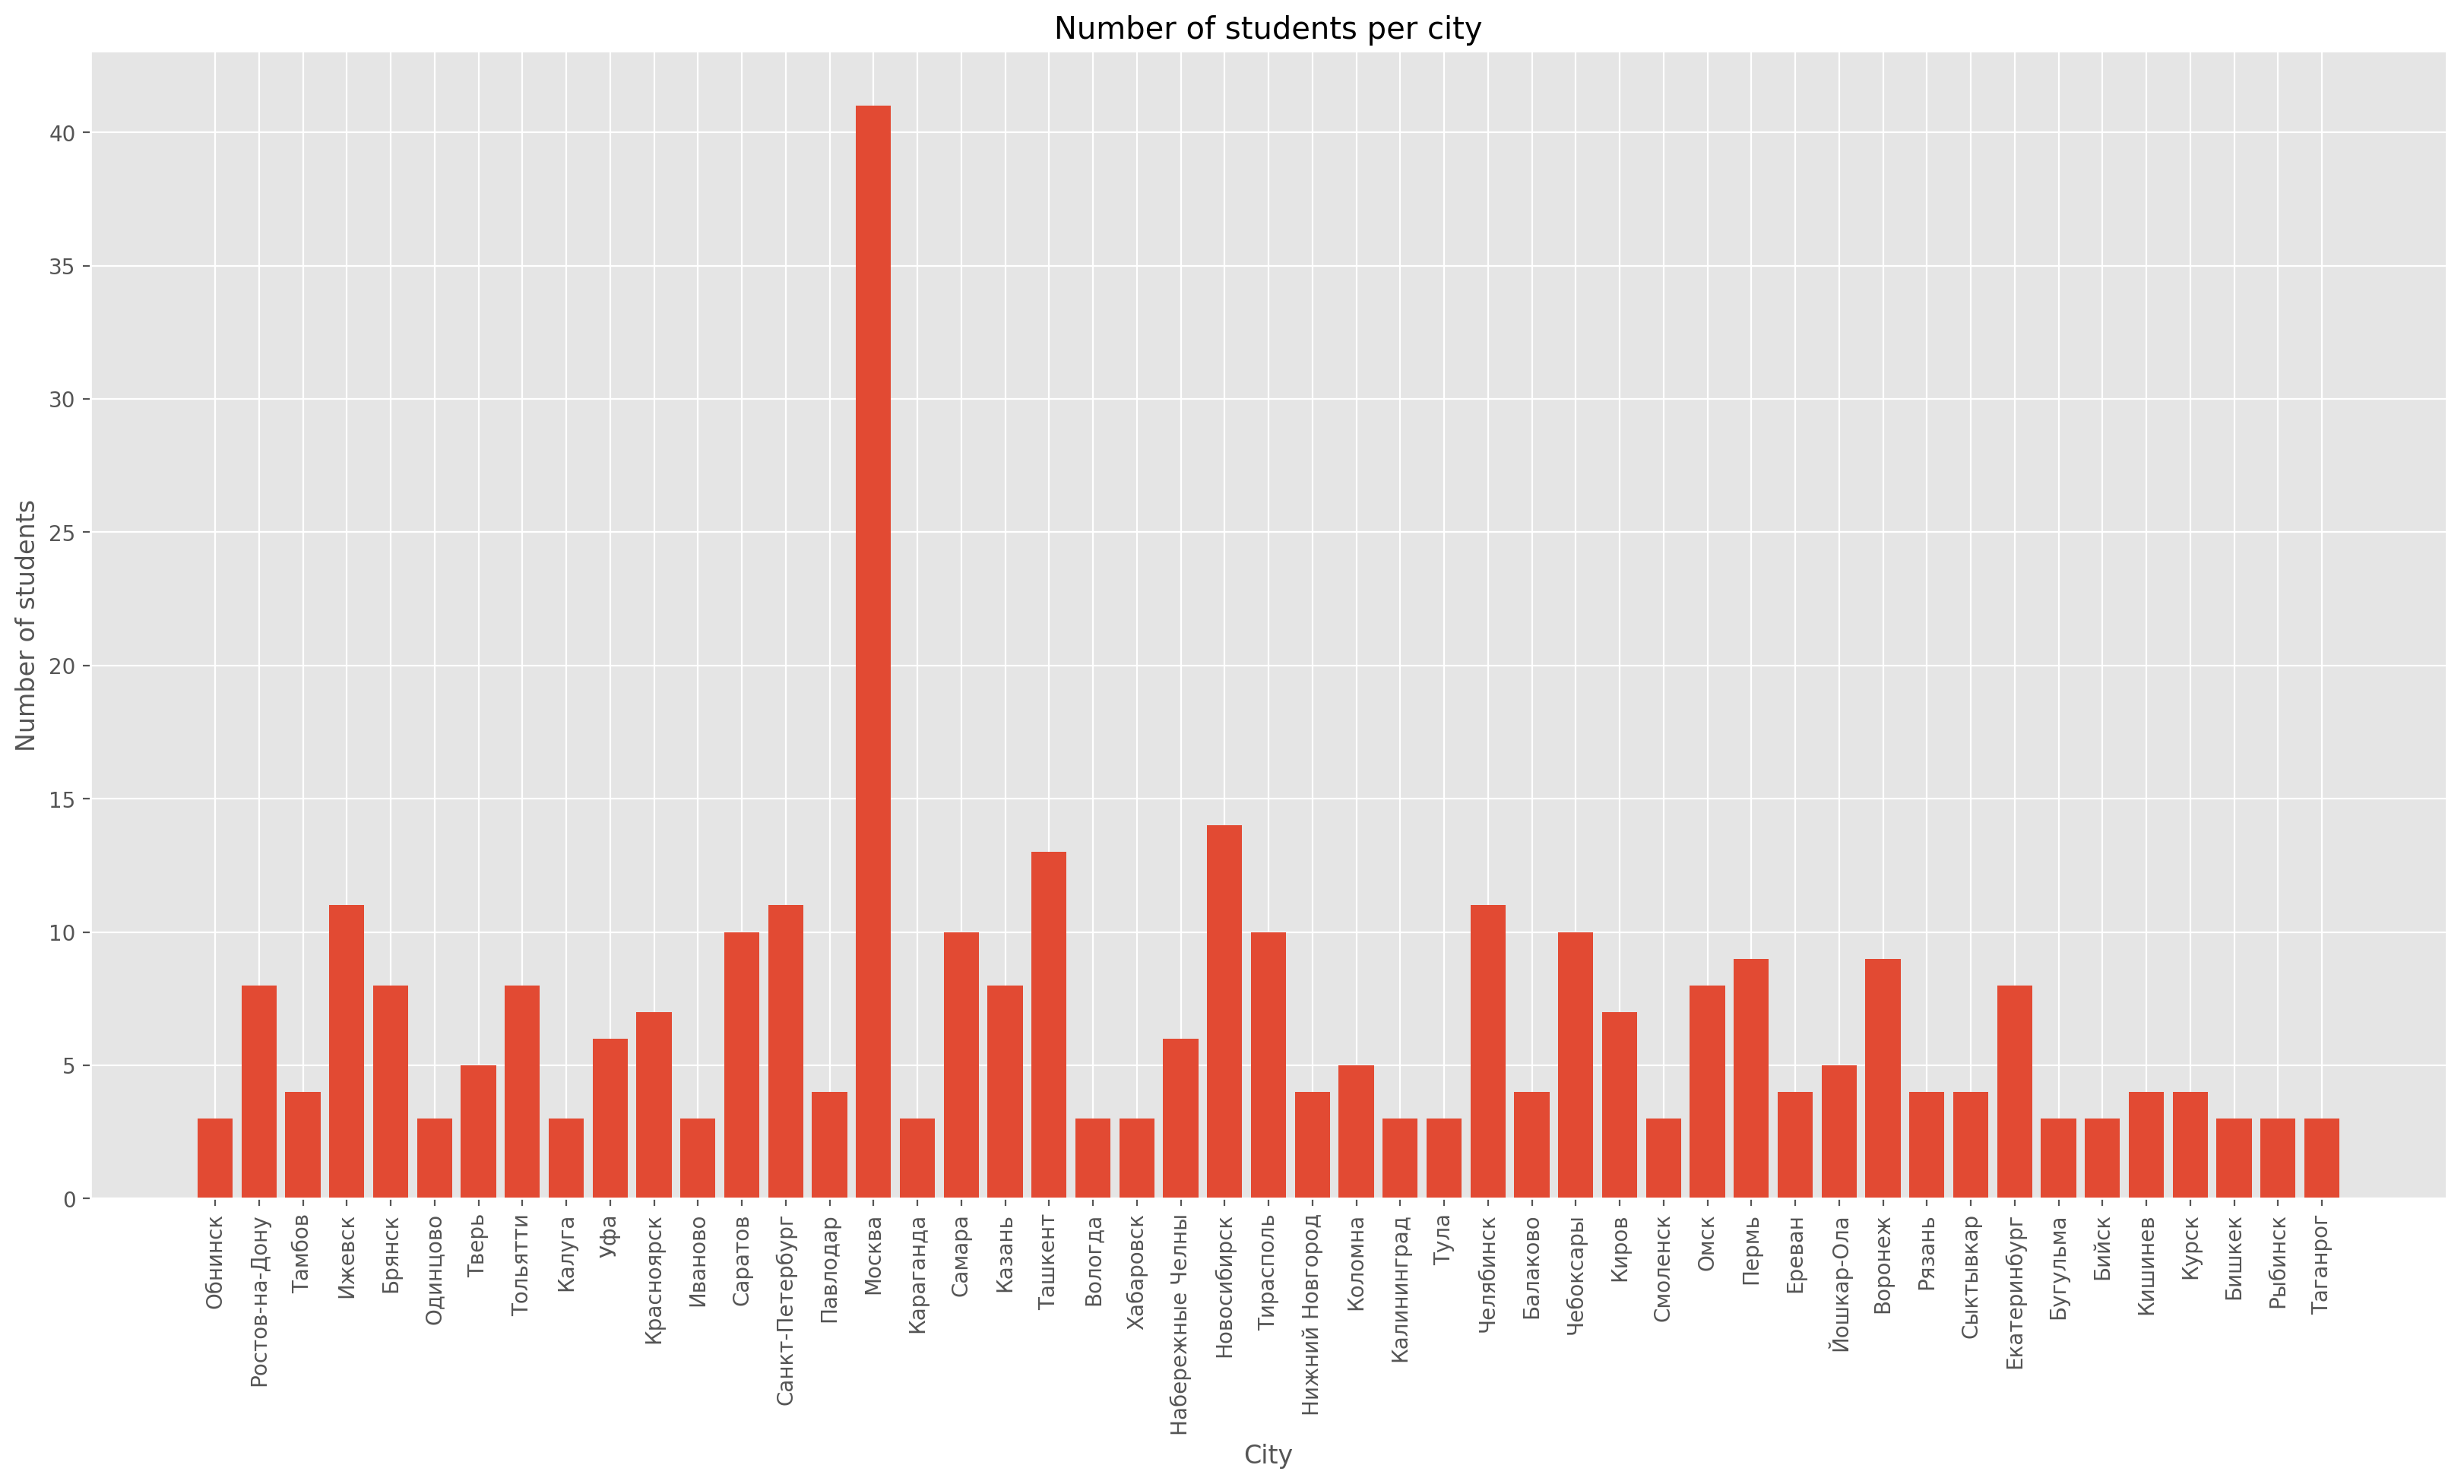

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

city_nums = [cities[city] for city in cities]
city_labs = [city for city in cities]
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(range(len(city_labs)), city_nums)

plt.title('Number of students per city')
plt.ylabel('Number of students')
plt.xlabel('City')
plt.xticks(range(len(city_labs)), city_labs, rotation=90)
#plt.legend()
plt.show()

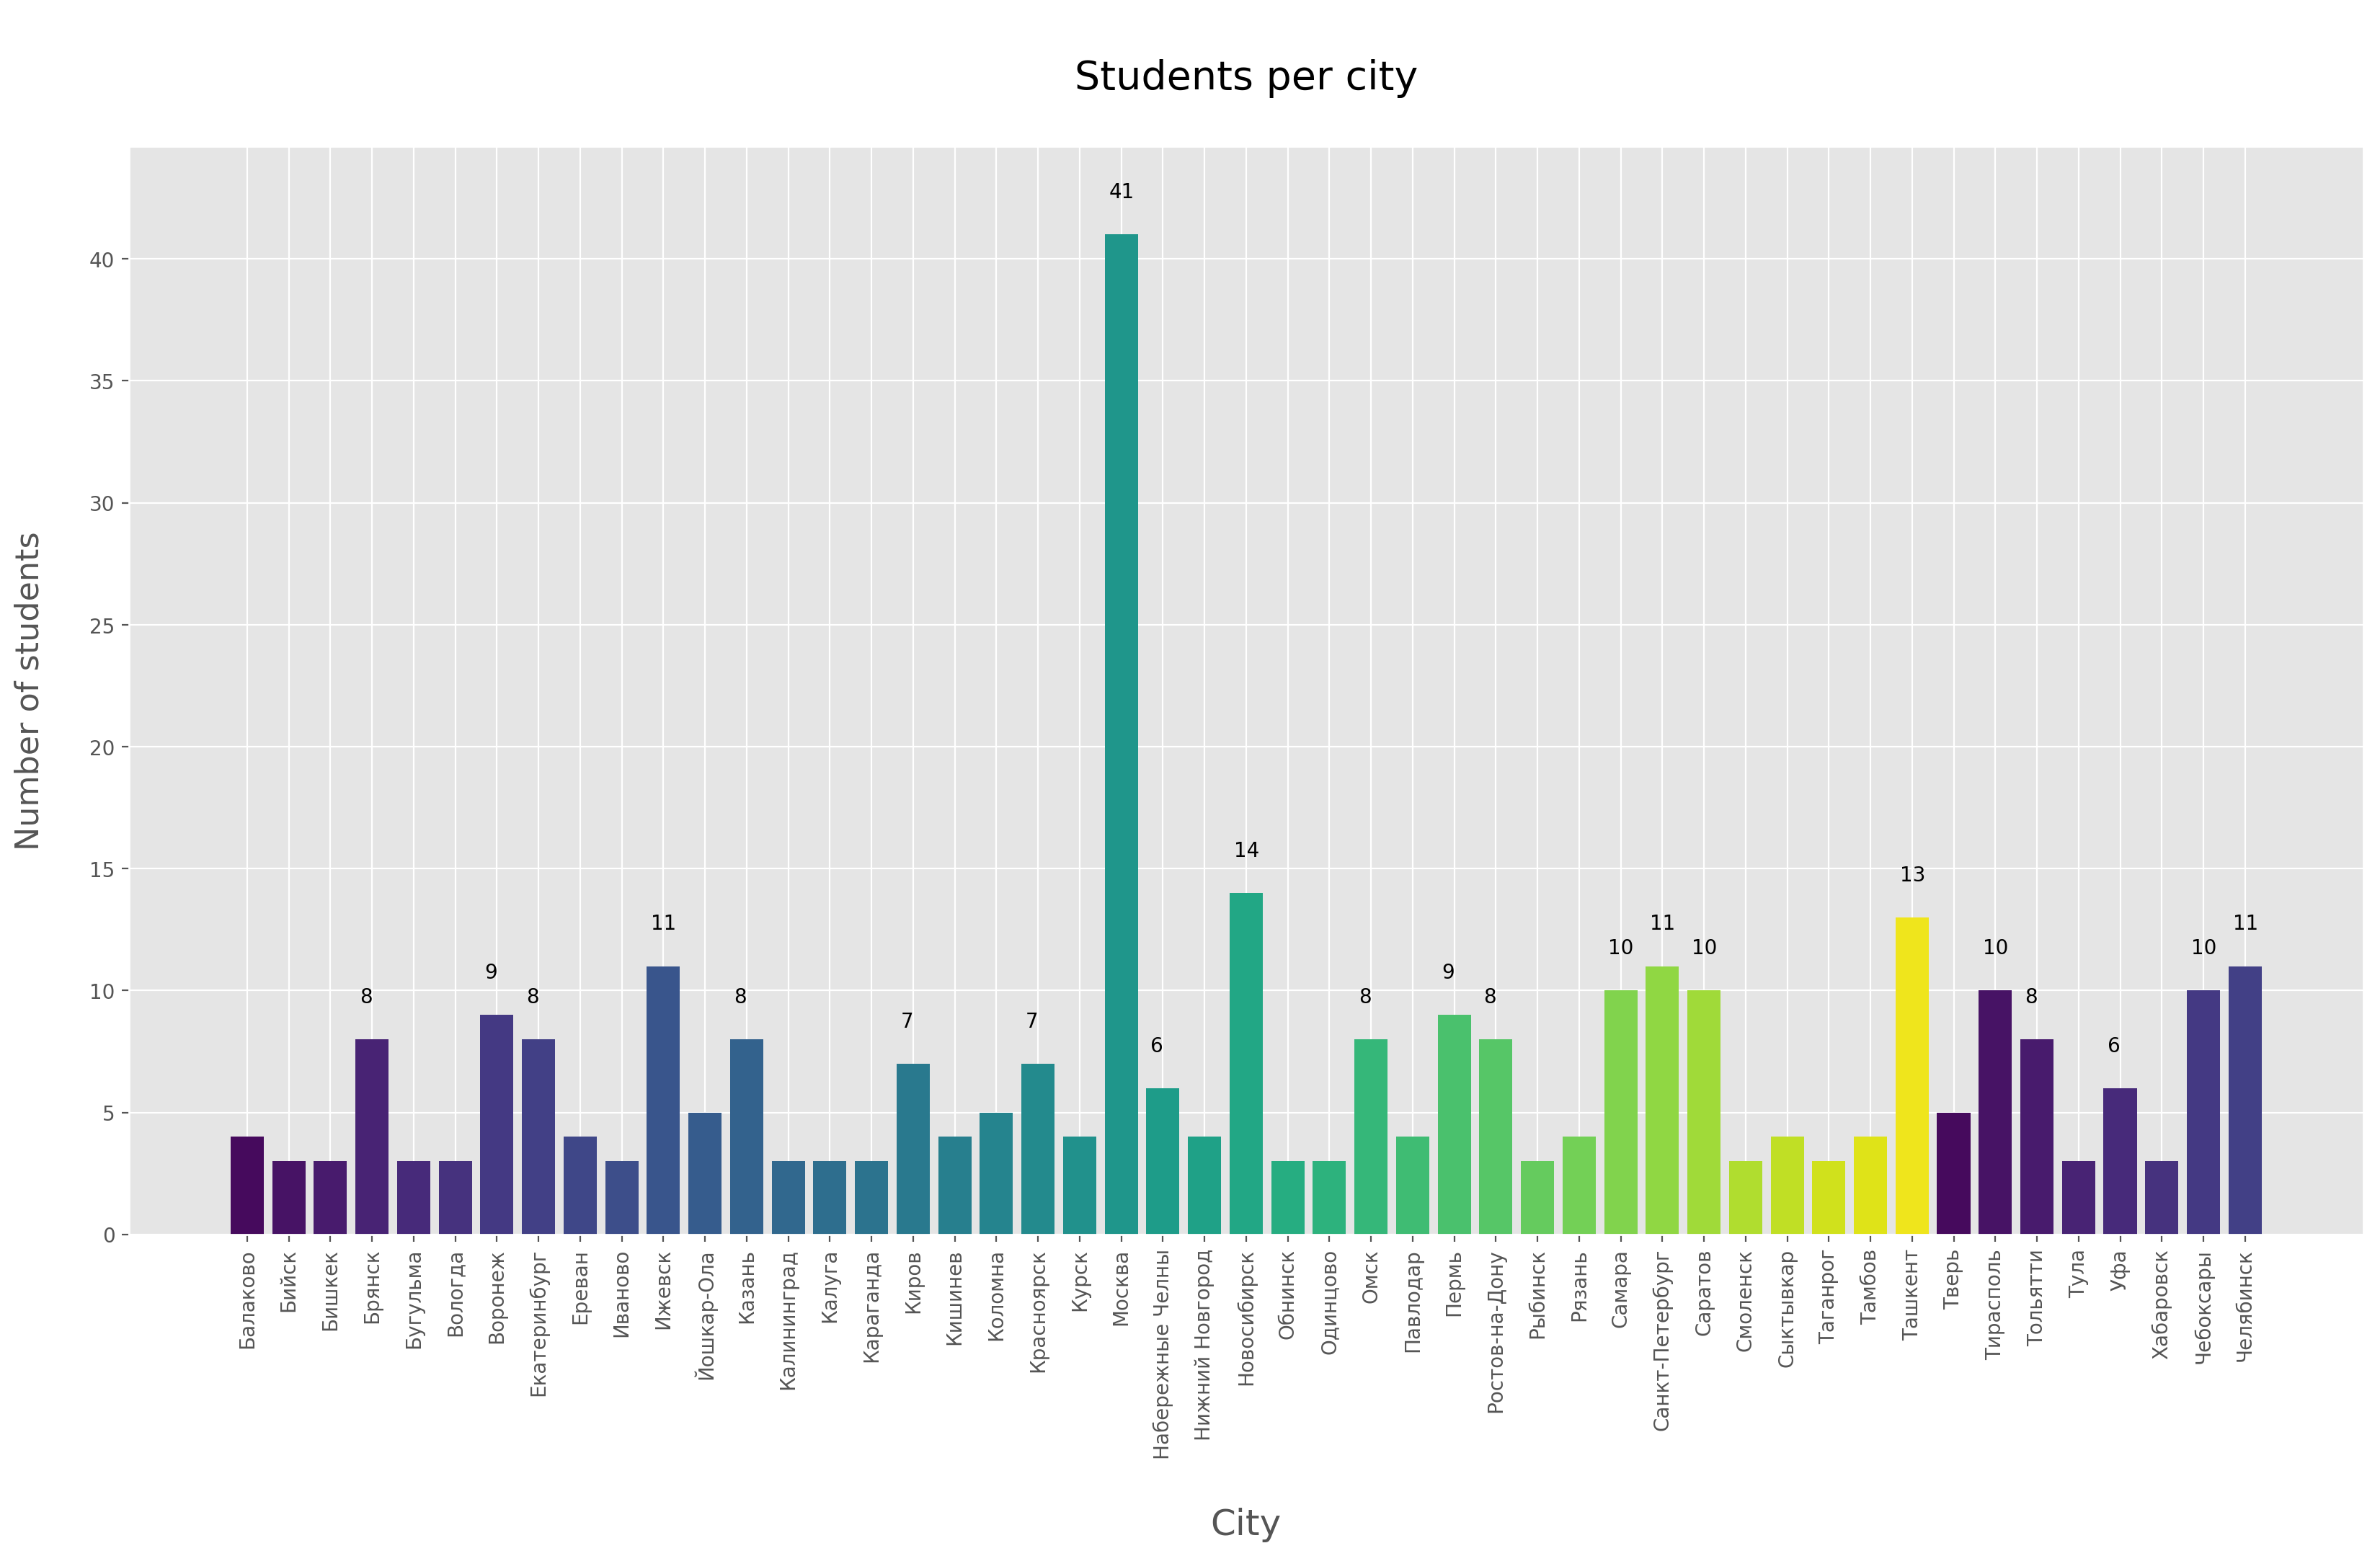

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

city_nums = [c[1] for c in sorted(cities.items(), key=lambda x: x[0], reverse=False)] # the data on the Y-axis
city_labs = sorted([city for city in cities]) # the X-axis labels # sorting the names of the cities alphabetically
x = range(len(city_labs)) # the data on the X-axis

# setting the palette
colors = sns.color_palette('viridis', max(city_nums)) 

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, city_nums, color=colors)

# drawing the number of students
for a, b in zip(x, city_nums):
    if b > 5:
        plt.scatter(a, b+1.5, s=0)
        plt.text(a-0.3, b+1.5, str(b))


plt.title('\nStudents per city\n',  fontsize=20)
plt.ylabel('Number of students\n',  fontsize=16)
plt.xlabel('\nCity',  fontsize=18)
plt.xticks(x, city_labs, rotation=90)
plt.show()

#### Задание 3

+ Скачайте примерно сто постов примерно ста пользователей из Москвы и Петербурга и посторойте диаграмму распределения у них слов Питерского сленга (например, 'поребрик', 'кура', 'бадлон')
+ Можно написать полностью свой код, можно отредактировать код, который лежит [тут](https://github.com/hse-python-2nd-2019/seminars/blob/master/different_api/VK_API_Examples_Task3.ipynb) (соответствующий файл с данными [тут](https://github.com/hse-python-2nd-2019/seminars/blob/master/different_api/data.csv))
+ Если появляется ошибка 6 (https://vk.com/dev/errors), слишком много запросов в секунду, не забывайте про опцию ```time.sleep ()``` модуля ```time```

#### Задание 4

+ Скачайте список пользователей, состоящих в группе https://vk.com/hse_university. Постройте столбчатую диаграмму, показывающую распределение пользователей по их году рождения.
+ Найдите, сколько в этой группе состоит пользователей, чьим университетом является не Вышка. Постройте диаграмму, показывающую распределение этих пользователей по университетам (если все не влезут, то 10 самых частотных университетов).
+ Соберите корпус записей в группе Вышки и комментариев к ним (можно взять первые 10000 записей). Найдите самые частотные биграммы в этом корпусе.